In [409]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.filterwarnings('ignore')
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
#Drop trivially known unneeded columns from the data before visualization
del data['Unnamed: 32']
del data['id']
#print(data)

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [410]:
data['diagnosis'].replace('B', 0, inplace=True)
data['diagnosis'].replace('M', 1, inplace=True)

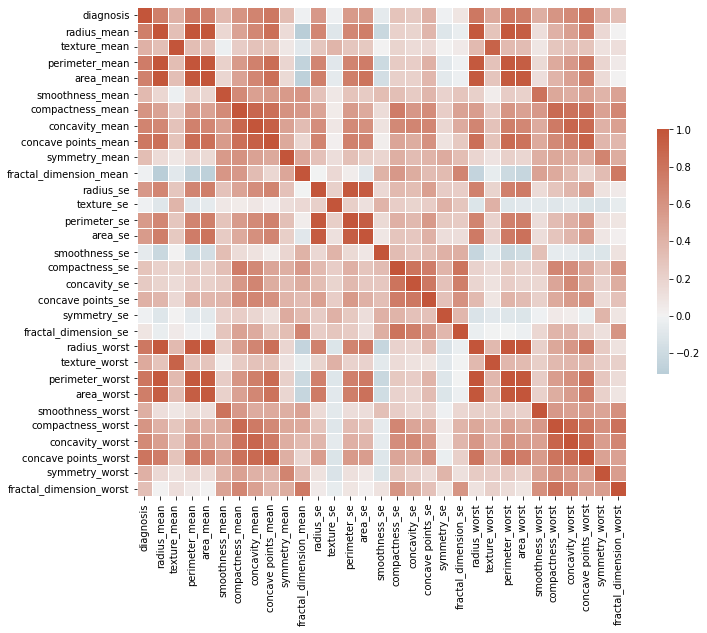

In [411]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(),  cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
correlation_matrix = data.corr()
diagnosis_correlation = correlation_matrix['diagnosis']


In [412]:
for column in data:
    if diagnosis_correlation[column] < 0.4:
        del data[column]

In [413]:
def get_dataset_partitions_pd(df):
    train_ds = df.sample(frac=0.8, random_state=12)
    second_split=df.drop(train_ds.index)
    val_ds = second_split.sample(frac=0.5, random_state=12)
    test_ds= second_split.drop(val_ds.index)
    return train_ds, val_ds, test_ds

In [414]:
train, validation, test = get_dataset_partitions_pd(data)
X_train = train.loc[:, train.columns != 'diagnosis']
y_train = train['diagnosis']

X_val = validation.loc[:, validation.columns != 'diagnosis']
y_val = validation['diagnosis']

X_test = test.loc[:, test.columns != 'diagnosis']
y_test = test['diagnosis']

In [415]:
from sklearn.linear_model import LogisticRegression
logisticRegr =  LogisticRegression(solver='liblinear')
logisticRegr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [416]:
score = logisticRegr.score(X_val, y_val)
print(score)

0.9649122807017544


In [417]:
X_allTrain = X_train.append(X_val)
y_allTrain = y_train.append(y_val)
logisticRegr.fit(X_allTrain, y_allTrain)
score = logisticRegr.score(X_test, y_test)
print(score)


0.9122807017543859
